In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sb
import scipy.stats as ss
import warnings
from IPython.display import display

warnings.filterwarnings('ignore')

In [2]:
!ls

CANCEL.R                         cancel1.csv
Cable TV - Market Analysis.ipynb cancel2.csv
cancel-orj.csv                   sil.sh


In [3]:
# grep -v ,,,, cancel1.csv >cancel2.csv
# delete ,,,, rows on linux command

data = pd.read_csv('cancel2.csv')

In [66]:
data[data['cancel_ind']==0].count()['state']/data.shape[0]

0.8821683918471881

In [67]:
data[data['cancel_ind']==1].count()['state']/data.shape[0]

0.11783160815281186

In [89]:
data['cancel_ind'].value_counts()

0    41334
1     5521
Name: cancel_ind, dtype: int64

In [4]:
data.head()

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,...,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,...,N,NO,NaN,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,NaN
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,...,N,NO,NaN,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,NaN
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,NaN
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,...,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,NaN
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,...,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,NaN


In [5]:
data.columns

Index(['mon', 'state', 'originalagency', 'speed', 'wirecenter', 'InstallType',
       'competitorname', 'ContractType', 'salesrepid', 'order_create_date',
       'canceldate', 'endclientsystem', 'hfws_ind', 'due_date',
       'FIRSTOFFEREDDATE', 'waitingdayofcustomers', 'waitingdayforcompany',
       'BUNDLE', 'BundleType', 'ONTRequired', 'ONTInstall', 'strOrderType',
       'strIsWinbackIndicator', 'notruckrollrequiredreason', 'droptype',
       'premisetype', 'ONTselfinstallcapable', 'saleschannel', 'bundlename',
       'smartcart', 'cancel_ind'],
      dtype='object')

In [6]:
pd.options.display.max_columns = None
data.head()
data.dtypes

mon                           object
state                         object
originalagency                object
speed                         object
wirecenter                    object
InstallType                   object
competitorname                object
ContractType                  object
salesrepid                    object
order_create_date             object
canceldate                    object
endclientsystem               object
hfws_ind                      object
due_date                      object
FIRSTOFFEREDDATE              object
waitingdayofcustomers         object
waitingdayforcompany          object
BUNDLE                        object
BundleType                    object
ONTRequired                   object
ONTInstall                    object
strOrderType                  object
strIsWinbackIndicator         object
notruckrollrequiredreason     object
droptype                      object
premisetype                   object
ONTselfinstallcapable         object
s

In [7]:
len(data.columns)

31

In [8]:
data.shape

(52156, 31)

In [9]:
data['hfws_ind'].isnull().sum()

49921

In [10]:
data.strIsWinbackIndicator.replace(np.nan, 'NO' ,inplace=True)

In [11]:
data.hfws_ind.replace(np.nan, 'N' ,inplace=True)

In [12]:
data.ONTselfinstallcapable.replace(np.nan, 'N' ,inplace=True)

In [13]:
data.cancel_ind.replace(np.nan, 0 ,inplace=True)

In [14]:
data.waitingdayofcustomers.replace('#VALUE!', np.nan ,inplace=True)

In [15]:
data.waitingdayforcompany.replace('#VALUE!', np.nan ,inplace=True)
data.canceldate.replace(np.datetime64('today'),np.nan,inplace=True)

In [16]:
data.head(100)

,mon,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,canceldate,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,NY11345685302,NY,REDVENT: REDVENT,FTTP_100M_100M,BREWSTER,TECH INSTALL,COMCAST,MONTHTOMONTH,A001696,2/4/18,NaN,COFEEANYWHERE,N,2/6/18,2/6/18,2,0,D,D,N,Y,N,NO,NaN,AERIAL,SFU,N,RED VENTURES,UNKNOWN,0,0.0
1,MD11346031526,MD,CSSC: CSSC,FTTP_1000M_1000M,OWEN BROWN,TECH INSTALL,COMCAST,CONTRACT,A002775,2/5/18,NaN,COA2GO,N,2/11/18,2/8/18,3,3,TDV,TDV,N,Y,N,NO,NaN,BURIED,SFU,N,BIG BOX,1000M + TV Mundo + FDV Unlim,0,0.0
2,PA11346211594,PA,ONLINE: ONLINE,FTTP_100M_100M,BRADDOCK,TECH INSTALL,COMCAST,MONTHTOMONTH,239B3PA,2/7/18,NaN,VZCOM,N,2/12/18,2/12/18,5,0,D,D,N,Y,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,UNKNOWN,1,0.0
3,VA11346969162,VA,CSSC: CSSC,FTTP_1000M_1000M,DRUMMONDS CORNER,TECH INSTALL,COX COMM,CONTRACT,V660449,2/9/18,NaN,COFEEANYWHERE,N,2/16/18,2/15/18,6,1,DV,DV,Y,N,M,NO,NaN,BURIED,SFU,N,CSSC,1000M + Extreme HD - 2014 + NO FDV,0,0.0
4,NY11345471806,NY,ONLINE: ONLINE,FTTP_1000M_1000M,LEVITTOWN,TECH INSTALL,CABLEVISION,CONTRACT,C7962VZ,2/3/18,NaN,VZCOM,N,2/15/18,2/13/18,10,2,TDV,TDV,N,Y,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,0.0
5,VA11345543843,VA,ONLINE: ONLINE,FTTP_1000M_1000M,SECOND AVENUE,TECH INSTALL,COMCAST,CONTRACT,PATEKR2,2/3/18,NaN,COFEEANYWHERE,N,2/11/18,2/6/18,3,5,DV,DV,N,Y,M,NO,NaN,AERIAL,SFU,N,CSSC,1000M + Custom TV Action and Entertainment + N...,0,0.0
6,VA11345571342,VA,CSSC: CSSC,FTTP_1000M_1000M,BRADDOCK ROAD,TECH INSTALL,COX COMM,CONTRACT,A001696,2/3/18,NaN,COA2GO,N,2/8/18,2/8/18,5,0,TDV,TDV,N,Y,M,NO,NaN,AERIAL,SFU,N,RED VENTURES,1000M + Preferred HD 2015 + FDV Unlim,0,0.0
7,RI11345574847,RI,RVCART: RED VENTURES CART PAID SEARCH,FTTP_100M_100M,WOONSOCKET,EONTSELFINSTALL,COX COMM,MONTHTOMONTH,A003930,2/3/18,NaN,VZCOM,Y,2/12/18,2/12/18,9,0,D,D,N,Y,N,NO,eONTSelfInstall,AERIAL,SFU,Y,ONLINE CON,UNKNOWN,0,0.0
8,NY11345490874,NY,ONLINE: ONLINE,FTTP_1000M_1000M,SYRACUSE FAIRMOUNT,TECH INSTALL,TIME WARNER,MONTHTOMONTH,C7962VZ,2/3/18,NaN,VZCOM,N,2/17/18,2/5/18,2,12,TDV,TDV,N,Y,M,NO,NaN,TEMP,SFU,N,ONLINE CON,1000M + Ultimate HD + FDV Unlim,0,0.0
9,DC11345486467,DC,ONLINE: ONLINE,FTTP_1000M_1000M,LINCOLN,TECH INSTALL,COMCAST,CONTRACT,123A0WB,2/3/18,NaN,VZCOM,N,2/12/18,2/6/18,3,6,TDV,TDV,Y,N,N,NO,NaN,AERIAL,SFU,N,ONLINE CON,1000M + Preferred HD 2015 + FDV Unlim,1,0.0


In [17]:
del data['canceldate']

In [18]:
del data['mon']

In [19]:
data.count()

state                        52156
originalagency               52156
speed                        52156
wirecenter                   52148
InstallType                  52156
competitorname               52100
ContractType                 52156
salesrepid                   51942
order_create_date            52156
endclientsystem              51973
hfws_ind                     52156
due_date                     51916
FIRSTOFFEREDDATE             50808
waitingdayofcustomers        50808
waitingdayforcompany         50779
BUNDLE                       48053
BundleType                   48053
ONTRequired                  48059
ONTInstall                   48059
strOrderType                 48059
strIsWinbackIndicator        52156
notruckrollrequiredreason     1858
droptype                     47942
premisetype                  47941
ONTselfinstallcapable        52156
saleschannel                 48059
bundlename                   52156
smartcart                    52156
cancel_ind          

In [20]:
data.dtypes

state                         object
originalagency                object
speed                         object
wirecenter                    object
InstallType                   object
competitorname                object
ContractType                  object
salesrepid                    object
order_create_date             object
endclientsystem               object
hfws_ind                      object
due_date                      object
FIRSTOFFEREDDATE              object
waitingdayofcustomers         object
waitingdayforcompany          object
BUNDLE                        object
BundleType                    object
ONTRequired                   object
ONTInstall                    object
strOrderType                  object
strIsWinbackIndicator         object
notruckrollrequiredreason     object
droptype                      object
premisetype                   object
ONTselfinstallcapable         object
saleschannel                  object
bundlename                    object
s

In [21]:
a= list(data[data['cancel_ind']==0].groupby('salesrepid').count()['cancel_ind'])
a.sort(reverse=True)
a

[7590,
 2405,
 2165,
 1846,
 1194,
 1107,
 546,
 505,
 487,
 397,
 395,
 283,
 277,
 249,
 240,
 209,
 196,
 191,
 183,
 174,
 173,
 157,
 154,
 147,
 145,
 137,
 130,
 130,
 127,
 112,
 106,
 105,
 100,
 97,
 97,
 95,
 90,
 87,
 84,
 83,
 83,
 82,
 81,
 81,
 78,
 76,
 72,
 71,
 69,
 69,
 68,
 68,
 67,
 67,
 66,
 66,
 65,
 65,
 64,
 64,
 63,
 62,
 61,
 61,
 58,
 58,
 57,
 55,
 54,
 54,
 52,
 51,
 50,
 50,
 49,
 49,
 48,
 48,
 48,
 47,
 47,
 47,
 46,
 46,
 45,
 45,
 45,
 44,
 43,
 43,
 42,
 41,
 41,
 40,
 40,
 39,
 38,
 38,
 38,
 37,
 37,
 37,
 36,
 36,
 35,
 35,
 35,
 34,
 34,
 33,
 32,
 31,
 31,
 31,
 31,
 31,
 31,
 30,
 30,
 30,
 27,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 25,
 25,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 22,
 22,
 22,
 22,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 19,
 19,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 18,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 

In [21]:
del data['salesrepid']

In [22]:
data.groupby('order_create_date').count()

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,notruckrollrequiredreason,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
order_create_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2/1/18,5003,5003,5003,5003,5003,5001,5003,5002,5003,4997,4936,4936,4936,4621,4621,4621,4621,4621,5003,173,4612,4612,5003,4621,5003,5003,5003
2/10/18,2711,2711,2711,2710,2711,2704,2711,2707,2711,2701,2630,2630,2626,2545,2545,2546,2546,2546,2711,121,2538,2538,2711,2546,2711,2711,2711
2/11/18,1821,1821,1821,1820,1821,1818,1821,1818,1821,1820,1764,1764,1764,1744,1744,1744,1744,1744,1821,87,1742,1742,1821,1744,1821,1821,1821
2/12/18,5503,5503,5503,5502,5503,5501,5503,5480,5503,5477,5242,5242,5242,5024,5024,5024,5024,5024,5503,221,5016,5016,5503,5024,5503,5503,5503
2/13/18,4705,4705,4705,4704,4705,4699,4705,4661,4705,4659,4455,4455,4455,4262,4262,4263,4263,4263,4705,189,4253,4253,4705,4263,4705,4705,4705
2/2/18,4783,4783,4783,4782,4783,4780,4783,4774,4783,4773,4721,4721,4721,4420,4420,4420,4420,4420,4783,167,4404,4404,4783,4420,4783,4783,4783
2/3/18,3111,3111,3111,3111,3111,3107,3111,3109,3111,3109,3083,3083,3083,2930,2930,2930,2930,2930,3111,97,2924,2924,3111,2930,3111,3111,3111
2/4/18,1474,1474,1474,1474,1474,1474,1474,1468,1474,1468,1456,1456,1455,1432,1432,1432,1432,1432,1474,65,1430,1430,1474,1432,1474,1474,1474
2/5/18,5355,5355,5355,5355,5355,5351,5355,5348,5355,5345,5281,5281,5281,4946,4946,4949,4949,4949,5355,180,4929,4930,5355,4949,5355,5355,5355


In [23]:
del data['order_create_date']

In [24]:
del data['due_date']

In [25]:
del data['FIRSTOFFEREDDATE']

In [26]:
del data['BUNDLE']
# BUNDLE same as Bundle_Type

In [27]:
data[data['cancel_ind']==1].groupby('bundlename').count()['cancel_ind']
# kalsin


bundlename
1000M + Custom TV Action and Entertainment + FDV Unlim     548
1000M + Custom TV Action and Entertainment + FTTP            6
1000M + Custom TV Action and Entertainment + NO FDV         65
1000M + Custom TV Home and Family + FDV Unlim              384
1000M + Custom TV Home and Family + FTTP                     4
1000M + Custom TV Home and Family + NO FDV                  30
1000M + Custom TV Infotainment and Drama + FDV Unlim       118
1000M + Custom TV Infotainment and Drama + FTTP              2
1000M + Custom TV Infotainment and Drama + NO FDV           14
1000M + Custom TV Kids and Pop + FDV Unlim                  36
1000M + Custom TV Kids and Pop + FTTP                        1
1000M + Custom TV Kids and Pop + NO FDV                      4
1000M + Custom TV Lifestyle and Reality + FDV Unlim        292
1000M + Custom TV Lifestyle and Reality + FTTP               2
1000M + Custom TV Lifestyle and Reality + NO FDV            33
1000M + Custom TV News and Variety + FDV Unl

In [23]:
data.isnull().sum()

state                            0
originalagency                   0
speed                            0
wirecenter                       8
InstallType                      0
competitorname                  56
ContractType                     0
salesrepid                     214
order_create_date                0
endclientsystem                183
hfws_ind                         0
due_date                       240
FIRSTOFFEREDDATE              1348
waitingdayofcustomers         1348
waitingdayforcompany          1377
BUNDLE                        4103
BundleType                    4103
ONTRequired                   4097
ONTInstall                    4097
strOrderType                  4097
strIsWinbackIndicator            0
notruckrollrequiredreason    50298
droptype                      4214
premisetype                   4215
ONTselfinstallcapable            0
saleschannel                  4097
bundlename                       0
smartcart                        0
cancel_ind          

In [24]:
data[data['cancel_ind']==1].groupby('notruckrollrequiredreason').count()['cancel_ind'] 

notruckrollrequiredreason
eONTSelfInstall    222
Name: cancel_ind, dtype: int64

In [25]:
del data['notruckrollrequiredreason']

In [26]:
data.dropna(axis=0, inplace=True)

## Data Label Encoding

In [27]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [28]:
data.dtypes

state                     object
originalagency            object
speed                     object
wirecenter                object
InstallType               object
competitorname            object
ContractType              object
salesrepid                object
order_create_date         object
endclientsystem           object
hfws_ind                  object
due_date                  object
FIRSTOFFEREDDATE          object
waitingdayofcustomers     object
waitingdayforcompany      object
BUNDLE                    object
BundleType                object
ONTRequired               object
ONTInstall                object
strOrderType              object
strIsWinbackIndicator     object
droptype                  object
premisetype               object
ONTselfinstallcapable     object
saleschannel              object
bundlename                object
smartcart                  int64
cancel_ind               float64
dtype: object

In [29]:
for x in data.columns:
    if (x!="waitingdayofcustomers") & (x!= "waitingdayforcompany"):
        le.fit(data[x])
        data[x]=le.transform(data[x])
        data[x] = data[x].astype('object')
    else:
        data[x]=data[x].astype('float')

In [30]:
data.dtypes

state                     object
originalagency            object
speed                     object
wirecenter                object
InstallType               object
competitorname            object
ContractType              object
salesrepid                object
order_create_date         object
endclientsystem           object
hfws_ind                  object
due_date                  object
FIRSTOFFEREDDATE          object
waitingdayofcustomers    float64
waitingdayforcompany     float64
BUNDLE                    object
BundleType                object
ONTRequired               object
ONTInstall                object
strOrderType              object
strIsWinbackIndicator     object
droptype                  object
premisetype               object
ONTselfinstallcapable     object
saleschannel              object
bundlename                object
smartcart                 object
cancel_ind                object
dtype: object

In [34]:
data.count()

state                    46894
originalagency           46894
speed                    46894
wirecenter               46894
InstallType              46894
competitorname           46894
ContractType             46894
endclientsystem          46894
hfws_ind                 46894
waitingdayofcustomers    46894
waitingdayforcompany     46894
BundleType               46894
ONTRequired              46894
ONTInstall               46894
strOrderType             46894
strIsWinbackIndicator    46894
droptype                 46894
premisetype              46894
ONTselfinstallcapable    46894
saleschannel             46894
bundlename               46894
smartcart                46894
cancel_ind               46894
dtype: int64

In [31]:
data.head(10)

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
0,6,17,1,74,6,2,1,168,7,2,0,29,29,2.0,0.0,0,0,0,1,1,0,0,3,0,17,337,0,0
1,4,6,0,472,6,2,0,234,8,1,0,5,31,3.0,3.0,5,5,0,1,1,0,1,3,0,0,37,0,0
2,7,13,1,69,6,2,1,19,10,10,0,6,8,5.0,0.0,0,0,0,1,1,0,0,3,0,12,337,1,0
3,9,6,0,173,6,3,0,3770,12,2,0,12,11,6.0,1.0,2,2,1,0,0,0,1,3,0,2,26,0,0
4,6,13,0,346,6,0,0,780,6,10,0,11,9,10.0,2.0,5,5,0,1,1,0,0,3,0,12,33,1,0
5,9,13,0,563,6,2,0,1669,6,2,0,5,29,3.0,5.0,2,2,0,1,0,0,0,3,0,2,2,0,0
6,9,6,0,70,6,3,0,168,6,1,0,32,31,5.0,0.0,5,5,0,1,0,0,0,3,0,17,33,0,0
7,8,18,1,690,1,3,1,399,6,10,1,6,8,9.0,0.0,0,0,0,1,1,0,0,3,1,12,337,0,0
8,6,13,0,603,6,7,1,780,6,10,0,13,28,2.0,12.0,5,5,0,1,0,0,7,3,0,12,42,0,0
9,1,13,0,351,6,2,0,2,6,10,0,6,29,3.0,6.0,5,5,1,0,1,0,0,3,0,12,33,1,0


In [32]:
data.corr()

,waitingdayofcustomers,waitingdayforcompany
waitingdayofcustomers,1.000000,0.012912
waitingdayforcompany,0.012912,1.000000


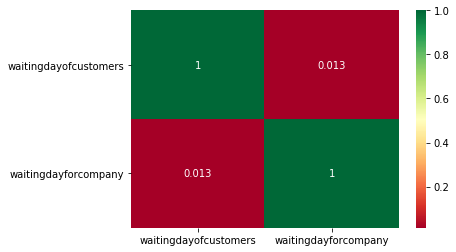

In [36]:
sb.heatmap(data.corr(),annot=True, cmap='RdYlGn')
plt.show()

## split data

In [34]:
y = data['cancel_ind']
X = data.drop('cancel_ind', axis=1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y)

## anova test

In [35]:
train = pd.concat([X_train,y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

In [36]:
numeric_col_names=[]
for feature in train:
    if (train[feature].dtype == 'int64') | (train[feature].dtype == 'float64'):
        numeric_col_names.append(feature) 

In [46]:
train.head()

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,salesrepid,order_create_date,endclientsystem,hfws_ind,due_date,FIRSTOFFEREDDATE,waitingdayofcustomers,waitingdayforcompany,BUNDLE,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
18390,6,6,1,440,6,7,1,1342,6,2,0,11,30,4.0,8.0,0,0,1,0,1,0,0,3,0,2,337,0,0
6275,6,13,1,563,6,7,1,780,2,10,0,18,8,1.0,9.0,0,0,0,1,1,0,4,0,0,12,337,1,0
15740,7,6,1,310,6,2,1,163,9,1,0,11,9,7.0,2.0,0,0,1,0,1,0,0,3,0,0,337,0,0
51618,9,13,0,360,6,2,0,2,7,10,0,5,32,5.0,2.0,5,5,1,1,1,0,1,3,1,12,0,1,0
9627,5,18,0,484,6,0,0,410,11,10,0,11,8,4.0,3.0,5,5,1,0,1,0,0,3,0,12,16,1,0


In [41]:
train[['state','speed']].head()

,state,speed
18390,6,1
6275,6,1
15740,7,1
51618,9,0
9627,5,0


In [43]:
train[numeric_col_names].head()

,waitingdayofcustomers,waitingdayforcompany
18390,4.0,8.0
6275,1.0,9.0
15740,7.0,2.0
51618,5.0,2.0
9627,4.0,3.0


In [45]:
train.loc[:, numeric_col_names].head()

,waitingdayofcustomers,waitingdayforcompany
18390,4.0,8.0
6275,1.0,9.0
15740,7.0,2.0
51618,5.0,2.0
9627,4.0,3.0


In [47]:
# kolon isimlerindeki verileri degişkene alıyoruz.
numeric_data=train.loc[:, numeric_col_names]
numeric_data.shape

(37484, 2)

In [51]:
train.groupby('cancel_ind').size()[0]

33067

In [55]:
from scipy import stats  

f=[]
p=[]

grps= pd.unique(train.cancel_ind.values) #[0,1]
k=len(pd.unique(train.cancel_ind)) # 2
N=len(train.values) # 37.515
n= train.groupby('cancel_ind').size()[0]  #33097
for i in range(0, len(numeric_col_names)):
    
    d_data= {grp:train[numeric_col_names[i]][train.cancel_ind == grp] for grp in grps} # 
    f_val, p_val = stats.f_oneway(d_data[0],d_data[1]) 
 
    f.append(f_val)
    p.append(p_val)



In [43]:
anova_df=pd.DataFrame(f,index=numeric_col_names, columns=['F-value'])
anova_df['p-value']=p

anova_df.sort_values(['F-value', 'p-value'], ascending = [False, True])

,F-value,p-value
waitingdayofcustomers,144.028528,4.027816e-33
waitingdayforcompany,118.127312,1.787006e-27


In [44]:
# p-values < 0.05, so these features are significant

In [45]:
data.dtypes

state                     object
originalagency            object
speed                     object
wirecenter                object
InstallType               object
competitorname            object
ContractType              object
endclientsystem           object
hfws_ind                  object
waitingdayofcustomers    float64
waitingdayforcompany     float64
BundleType                object
ONTRequired               object
ONTInstall                object
strOrderType              object
strIsWinbackIndicator     object
droptype                  object
premisetype               object
ONTselfinstallcapable     object
saleschannel              object
bundlename                object
smartcart                 object
cancel_ind                object
dtype: object

## chi-square analysis

In [46]:
c=[]
for feature in train:
    if (train[feature].dtype == 'object' and feature!='cancel_ind'):
        c.append(feature) 


In [47]:
l=[]
for feature in c:
    confusion_matrix = pd.crosstab(data[feature], data.cancel_ind)
  #  print (confusion_matrix)
    conti=ss.chi2_contingency(confusion_matrix.values)
    l.append(conti[1])

In [48]:
chi_test=pd.DataFrame(l,index=c, columns=['p-values'])

chi_sorted = chi_test.sort_values(['p-values'], ascending = False)
chi_sorted

,p-values
ONTselfinstallcapable,1.304731e-01
premisetype,4.443306e-09
droptype,5.924821e-11
bundlename,3.411482e-13
state,2.648321e-19
wirecenter,7.201007e-21
strOrderType,6.633550e-24
ContractType,1.244091e-29
speed,8.858873e-33
ONTInstall,1.832978e-34


In [49]:
# ONTselfinstallcapable will be removed, because p_value = 0,13 > 0,05
del data['ONTselfinstallcapable']

In [50]:
train.head()

,state,originalagency,speed,wirecenter,InstallType,competitorname,ContractType,endclientsystem,hfws_ind,waitingdayofcustomers,waitingdayforcompany,BundleType,ONTRequired,ONTInstall,strOrderType,strIsWinbackIndicator,droptype,premisetype,ONTselfinstallcapable,saleschannel,bundlename,smartcart,cancel_ind
13482,6,6,0,31,6,0,0,2,0,10.0,0.0,5,1,0,1,0,0,3,0,4,42,0,0
17749,6,18,1,87,1,7,1,10,0,9.0,0.0,0,0,1,1,0,0,3,1,12,338,1,0
1516,5,17,1,446,6,7,1,2,0,4.0,1.0,0,0,1,1,0,0,3,0,17,338,0,0
10059,4,6,0,100,6,2,0,2,0,20.0,26.0,2,1,0,1,0,1,3,0,2,35,1,0
5591,9,17,0,270,6,2,0,2,0,2.0,0.0,5,0,1,1,0,1,3,0,17,42,0,0


In [51]:
from sklearn.preprocessing import LabelEncoder

y=data.cancel_ind
le = LabelEncoder()
y=le.fit_transform(y)

In [52]:
data.shape

(46894, 22)

In [53]:
for x in data.columns:
    if (x!="waitingdayofcustomers") & (x!= "waitingdayforcompany"):
        le.fit(data[x])
        data[x]=le.transform(data[x])
        data[x] = data[x].astype('category')
    else:
        data[x]=data[x].astype('float')

# Feature Selection with 

## Boruta

In [54]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy


In [55]:
y=data['cancel_ind']
del data['cancel_ind']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(data,y,test_size=0.2, stratify=y)

In [57]:
y = y.ravel()

In [58]:
# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
feat_selector.fit(X_train.as_matrix(),y_train.as_matrix())
# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

# call transform() on X to filter it down to selected features
X_filtered = feat_selector.transform(X_train.as_matrix())

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	15
Tentative: 	3
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	2
Rejected: 	3
I

In [59]:
print (feat_selector.n_features_)

17


In [60]:
feature_df = pd.DataFrame(X_train.columns.tolist(), columns=['features'])
feature_df ['rank']=feat_selector.ranking_

In [61]:
print (feature_df.head(feat_selector.n_features_))

                 features  rank
0                   state     4
1          originalagency     1
2                   speed     1
3              wirecenter     2
4             InstallType     1
5          competitorname     1
6            ContractType     1
7         endclientsystem     1
8                hfws_ind     1
9   waitingdayofcustomers     1
10   waitingdayforcompany     1
11             BundleType     1
12            ONTRequired     1
13             ONTInstall     1
14           strOrderType     1
15  strIsWinbackIndicator     1
16               droptype     3


## SelectKBest

In [62]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import chi2

In [63]:
selector = SelectKBest(f_classif, k = 5)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(X_train, y_train)
names = X_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

              Feat_names     F_Scores
0        endclientsystem  1803.200372
4              smartcart   287.305290
1               hfws_ind   215.879205
2             BundleType   196.000195
3  strIsWinbackIndicator   176.793923


##  LinearSVC

In [64]:
from sklearn import feature_selection
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion, Pipeline

# classifier
LinearSVC1 = LinearSVC(tol=1e-4,  C = 0.10000000000000001)
f5 = feature_selection.RFE(estimator=LinearSVC1, n_features_to_select=5, step=1)

pipeline = Pipeline([
    ('rfe_feature_selection', f5),
    ('clf', LinearSVC1)
    ])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('rfe_feature_selection', RFE(estimator=LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=5, step=1, ver...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [65]:
support = pipeline.named_steps['rfe_feature_selection'].support_
feature_names = np.array(X_train.columns) # transformed list to array

feature_names[support]

array(['hfws_ind', 'ONTRequired', 'strOrderType', 'strIsWinbackIndicator',
       'smartcart'], dtype=object)

## RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

In [67]:
model = ExtraTreesClassifier()
rfe = RFE(model, 5)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_ )
print("Selected Features: %s" % fit.support_ )
print("Feature Ranking: %s" % fit.ranking_ )

Num Features: 5
Selected Features: [False False False  True False False False  True False  True  True False
 False False False False False False  True False False]
Feature Ranking: [ 4  3  6  1 17  7 13  1 14  1  1  8 12 16 10 15  5 11  1  2  9]


In [68]:
feature_names = np.array(X_train.columns) # transformed list to array
feature_names[fit.support_]

array(['wirecenter', 'endclientsystem', 'waitingdayofcustomers',
       'waitingdayforcompany', 'saleschannel'], dtype=object)

# MODEL BUILDING

## DECISION TREE

In [69]:
from sklearn import tree

dt = tree.DecisionTreeClassifier()

In [70]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
y_predi = dt.predict(X_test)

In [1]:
from sklearn.metrics.classification import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'sklearn.metrics.classification'

In [73]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.898 

[[7749  434]
 [ 526  670]] 

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      8183
           1       0.61      0.56      0.58      1196

   micro avg       0.90      0.90      0.90      9379
   macro avg       0.77      0.75      0.76      9379
weighted avg       0.89      0.90      0.90      9379



## RANDOM FOREST

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
y_predi = rf.predict(X_test)

In [78]:
nn_tra_accy = round(accuracy_score(rf.predict(X_train), y_train), 3)
print ("train accuracy :",nn_tra_accy,"\n")
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print ("test accuracy :",nn_accy,"\n")

nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

train accuracy : 0.99 

test accuracy : 0.921 

[[8187  651]
 [  88  453]] 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      8838
           1       0.41      0.84      0.55       541

   micro avg       0.92      0.92      0.92      9379
   macro avg       0.70      0.88      0.75      9379
weighted avg       0.96      0.92      0.93      9379



## LOGISTIC REGRESSION

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
lr = LogisticRegression()

In [81]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [82]:
y_predi = lr.predict(X_test)

In [83]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.908 

[[8247  832]
 [  28  272]] 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9079
           1       0.25      0.91      0.39       300

   micro avg       0.91      0.91      0.91      9379
   macro avg       0.62      0.91      0.67      9379
weighted avg       0.97      0.91      0.93      9379



NameError: name 'acc' is not defined

## Neural Network - KERAS

In [84]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(8, input_dim=X_train.shape[1], activation='relu'),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(np.array(X_train), np.array(y_train), epochs=10)
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

Epoch 1/10
37515/37515 [==============================] - 1s 40us/step - loss: 2.5376 - acc: 0.7634
Epoch 2/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.3226 - acc: 0.9005
Epoch 3/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2942 - acc: 0.9110
Epoch 4/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2861 - acc: 0.9146
Epoch 5/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2825 - acc: 0.9163
Epoch 6/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2808 - acc: 0.9170
Epoch 7/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2792 - acc: 0.9173
Epoch 8/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2787 - acc: 0.9166
Epoch 9/10
37515/37515 [==============================] - 1s 35us/step - loss: 0.2780 - acc: 0.9174
Epoch 10/10
9379/9379 [==============================] - 0s 20us/step
[0.29134163248782374, 0.912890

In [125]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(8,input_dim=X_train.shape[1],activation='relu'))
classifier.add(Dense(1,activation='relu'))
classifier.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(np.array(X_train), np.array(y_train), epochs=10)
loss_and_metrics = classifier.evaluate(X_test, y_test)
print(loss_and_metrics)

Epoch 1/10
37515/37515 [==============================] - 2s 45us/step - loss: 2.9045 - acc: 0.8097
Epoch 2/10
37515/37515 [==============================] - 1s 37us/step - loss: 1.9327 - acc: 0.8795
Epoch 3/10
37515/37515 [==============================] - 2s 41us/step - loss: 1.8992 - acc: 0.8821
Epoch 4/10
37515/37515 [==============================] - 2s 42us/step - loss: 1.8990 - acc: 0.8822
Epoch 5/10
37515/37515 [==============================] - 1s 38us/step - loss: 1.8990 - acc: 0.8822
Epoch 6/10
37515/37515 [==============================] - 1s 37us/step - loss: 1.8990 - acc: 0.8822
Epoch 7/10
37515/37515 [==============================] - 2s 42us/step - loss: 1.8990 - acc: 0.8822
Epoch 8/10
37515/37515 [==============================] - 1s 38us/step - loss: 1.8990 - acc: 0.8822
Epoch 9/10
37515/37515 [==============================] - 1s 38us/step - loss: 1.8990 - acc: 0.8822
Epoch 10/10
9379/9379 [==============================] - 0s 20us/step
[1.8972870849173467, 0.8822902

In [86]:
y_train.describe()

count     37515
unique        2
top           0
freq      33097
Name: cancel_ind, dtype: int64

## SVM

In [87]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf')

In [88]:
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [89]:
y_predi=svm.predict(X_test)

In [90]:
nn_accy = round(accuracy_score(y_predi, y_test), 3)
print (nn_accy,"\n")
nnconfmat = confusion_matrix(y_predi,y_test)
print(nnconfmat,"\n")
nnrep = classification_report(y_predi, y_test)
print(nnrep)

0.884 

[[8261 1077]
 [  14   27]] 

              precision    recall  f1-score   support

           0       1.00      0.88      0.94      9338
           1       0.02      0.66      0.05        41

   micro avg       0.88      0.88      0.88      9379
   macro avg       0.51      0.77      0.49      9379
weighted avg       0.99      0.88      0.93      9379



recall : TP/(TP+FN) - pozitiflerin ne kadarını doğru yakaladın - what percent of the positive did you catch?
precision: TP/(TP+FP)  - yaptığın positif tahminlerin ne kadarı doğru - what percent of positive predictions were correct?

<p>FN: 0 diyoruz, 1 çıkıyor
<p>T:1, F:0
<p>TP: 1 diyoruz, 1 çıkıyoruz
<p>FP: 1 diyoruz, 0 çıkıyor
<p>TN: 0 diyoruz, 0 çıkıyor

hedef: cancel edenleri daha fazla/doğru yakalamak istiyorum.
Dolayısıyla recall'a bakıyoruz. recall'in 1'e yakın olması daha önemli. 
modelleri değerlendirirsek en iyi modelin randomforest olduğunu düşünebiliriz. çünkü, hem recal'i yüksek hemde f1 score'i diğer modellere göre daha yüksek.

<h2>Try to oversampling method

In [91]:
# Import the hopeful solution to our problems
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [92]:
# Setting up new variables for ML
X_sm, y_sm = smote.fit_sample(data,y)

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# Defining a new function with revised inputs for the new SMOTE variables
def model_sm(mod, model_name, x_train_sm, y_train_sm, x_test_sm, y_test_sm):
    mod.fit(x_train_sm, y_train_sm)
    print(model_name)
    acc = cross_val_score(mod, X_train_sm, y_train_sm, scoring = "accuracy", cv = 5)
    predictions = cross_val_predict(mod, X_train_sm, y_train_sm, cv = 5)

    y_predi = mod.predict(X_test_sm)
    acc_test = round(accuracy_score(y_predi, y_test_sm), 3)

    print("Train Accuracy:", round(acc.mean(),3))
    print("Test Accuracy:",round(acc_test,3))
    cm = confusion_matrix(predictions, y_train_sm)
    print("Confusion Matrix:  \n", cm)
    print("                    Classification Report \n",classification_report(predictions, y_train_sm))


In [127]:
# 1. Random Forest Classifier
ran = RandomForestClassifier(n_estimators=50)
model_sm(ran, "Random Forest Classifier", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Random Forest Classifier
Train Accuracy: 0.959
Test Accuracy: 0.96
Confusion Matrix:  
 [[28464  2020]
 [  420 27016]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     30484
           1       0.93      0.98      0.96     27436

   micro avg       0.96      0.96      0.96     57920
   macro avg       0.96      0.96      0.96     57920
weighted avg       0.96      0.96      0.96     57920



In [95]:
# 2. Logistic Regression
log = LogisticRegression()
model_sm(log, "Logistic Regression", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Logistic Regression
Train Accuracy: 0.672
Test Accuracy: 0.664
Confusion Matrix:  
 [[20581 10694]
 [ 8303 18342]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.66      0.68     31275
           1       0.63      0.69      0.66     26645

   micro avg       0.67      0.67      0.67     57920
   macro avg       0.67      0.67      0.67     57920
weighted avg       0.68      0.67      0.67     57920



In [96]:
# 3. Linear SVC
svc = LinearSVC()
model_sm(svc, "Linear SVC", X_train_sm, y_train_sm, X_test_sm, y_test_sm)

Linear SVC
Train Accuracy: 0.57
Test Accuracy: 0.627
Confusion Matrix:  
 [[12550  9467]
 [16334 19569]]
                    Classification Report 
               precision    recall  f1-score   support

           0       0.43      0.57      0.49     22017
           1       0.67      0.55      0.60     35903

   micro avg       0.55      0.55      0.55     57920
   macro avg       0.55      0.56      0.55     57920
weighted avg       0.58      0.55      0.56     57920



# hyper parameters tuning with GridSearchCV in RandomForest

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [102]:
# Fit the grid search to the data
grid_search.fit(X_train_sm, y_train_sm)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 33.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 78.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 101.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110], 'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5], 'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [103]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [117]:
clf = grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=90,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=8, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [123]:
clf = RandomForestClassifier(min_samples_split = 8, 
                             n_estimators = 200, 
                             max_depth = 90,
                             max_features =3,
                             min_samples_leaf = 3,
                             bootstrap= True)
clf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=90, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=8,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [124]:
predictions = clf.predict(X_test_sm)
print(accuracy_score(y_test_sm, predictions))

0.9584273283918788
